In [1]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from keras.preprocessing.text import text_to_word_sequence
from tqdm import tqdm
import fastText
import gc

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_dir = '../input/new_data/train_remove60.csv'
test_dir = '../input/new_data/test_remove60.csv'
train = pd.read_csv(train_dir)
test = pd.read_csv(test_dir)

In [3]:
all_data = pd.concat([train,test])
all_data = all_data.reset_index(drop=True)

In [4]:
model = Word2Vec(size=600, window=5, max_vocab_size=None, iter=10,min_count=5)

In [5]:
train2 = all_data['word_seg'].values

In [6]:
train2 = [text_to_word_sequence(text) for text in tqdm(train2)]

100%|██████████| 204554/204554 [00:19<00:00, 10481.72it/s]


In [7]:
model.build_vocab(train2)
model.train(train2, total_examples=model.corpus_count, epochs=10)

(1093864068, 1398101670)

In [ ]:
model.save('../feature/word2vec_file/remove60_10step_word_600d.w2v')

In [5]:
all_data['text'] = all_data['word_seg'].str.cat([all_data.article], sep=' ',na_rep='')
all_data.drop(['word_seg', 'article'], axis = 1, inplace=True)

In [6]:
step = 60000
for i in tqdm(range(0, 4)):
    update = False
    if i != 0:
        update = True
    train2 = all_data.loc[i*step:(i+1)*step,'text'].values
    train2 = [text_to_word_sequencbae(text) for text in tqdm(train2)]
    model.build_vocab(train2, update=update)
    model.train(train2, total_examples=model.corpus_count, epochs=3)
    del train2
    gc.collect()

 20%|██        | 12087/60001 [00:03<00:12, 3846.47it/s]


100%|██████████| 4/4 [2:48:36<00:00, 2529.13s/it]9it/s]


In [3]:
from gensim.models import Word2Vec
corpus = np.concatenate([train.article.values, test.article.values,], axis=0)
seg_corpus = [_.split() for _ in corpus]
print(len(seg_corpus))
word2vec = Word2Vec(seg_corpus, size=300)
word2vec.wv.save_word2vec_format("../feature/word2vec_file/char_embed.own")

204554


In [3]:
# from gensim.models import Word2Vec
corpus = np.concatenate([train.word_seg.values, test.word_seg.values,], axis=0)
seg_corpus = [_.split() for _ in corpus]
print(len(seg_corpus))
word2vec = Word2Vec(seg_corpus, size=300)
word2vec.wv.save_word2vec_format("../feature/word2vec_file/word_embed.own")

204554


In [7]:
def bin2vec(model,fileName):
    words = model.get_words()
    out = open(fileName, 'w')
    for w in words:
        v = model.get_word_vector(w)
        vstr = ""
        for vi in v:
            vstr += " " + str(vi)
        out.write(w + vstr + "\n")


def writeData(sentences,fileName):
    print("writing data to fasttext format...")
    out=open(fileName,'w')
    for sentence in sentences:
        out.write(" ".join(sentence)+"\n")
    print("done!")

In [8]:
# corpus = np.concatenate([train.word_seg.values, test.word_seg.values,], axis=0)
# seg_corpus = [_.split() for _ in corpus]
# print("start")
# fasttext_data_path = '../feature/fasttext_corpus'
# writeData(seg_corpus,fasttext_data_path)
# print("next")
# model=fastText.train_unsupervised(fasttext_data_path,model = 'skipgram', dim=300,epoch = 5)
# print("train done")
bin2vec(model,"../feature/word2vec_file/fastword_embed.own")



In [ ]:
corpus = np.concatenate([train.article.values, test.article.values,], axis=0)
seg_corpus = [_.split() for _ in corpus]
fasttext_data_path = '../feature/fasttext_corpus'
writeData(seg_corpus,fasttext_data_path)
model=fastText.train_unsupervised(fasttext_data_path,model = 'skipgram',lr = 0.07,dim=200,epoch = 5)
bin2vec(model,"../feature/word2vec_file/fast_char_embed.own")

In [8]:
train['lenght'] = train['word_seg'].apply(lambda x: len(x.split(' ')))

In [13]:
from keras.preprocessing.text import Tokenizer
column = "word_seg"
len_desc = None
tknzr_word = Tokenizer(num_words=len_desc)
tknzr_word.fit_on_texts(all_data[column].values)
tr_word_seq = tknzr_word.texts_to_sequences(train[column].values)
te_word_seq = tknzr_word.texts_to_sequences(test[column].values)

In [14]:
totalNumWords = [len(one_comment) for one_comment in tr_word_seq]

In [15]:
import matplotlib.pyplot as plt

(array([2.000e+00, 2.000e+00, 5.900e+01, 7.590e+02, 9.490e+02, 9.450e+02,
        8.650e+02, 8.410e+02, 8.300e+02, 8.500e+02, 7.960e+02, 8.010e+02,
        7.520e+02, 7.470e+02, 7.920e+02, 7.720e+02, 7.800e+02, 8.400e+02,
        8.480e+02, 8.700e+02, 9.130e+02, 9.300e+02, 1.047e+03, 1.104e+03,
        1.112e+03, 1.099e+03, 1.138e+03, 1.133e+03, 1.145e+03, 1.183e+03,
        1.215e+03, 1.279e+03, 1.211e+03, 1.262e+03, 1.218e+03, 1.295e+03,
        1.259e+03, 1.321e+03, 1.286e+03, 1.305e+03, 1.348e+03, 1.269e+03,
        1.248e+03, 1.274e+03, 1.154e+03, 1.139e+03, 1.138e+03, 1.132e+03,
        1.101e+03, 1.078e+03, 1.149e+03, 1.139e+03, 1.079e+03, 1.056e+03,
        1.046e+03, 9.740e+02, 9.640e+02, 9.220e+02, 9.580e+02, 8.760e+02,
        8.920e+02, 8.930e+02, 8.480e+02, 8.390e+02, 8.270e+02, 7.730e+02,
        7.790e+02, 7.000e+02, 7.370e+02, 6.720e+02, 6.680e+02, 6.800e+02,
        6.070e+02, 6.210e+02, 6.130e+02, 6.250e+02, 5.680e+02, 5.670e+02,
        5.500e+02, 5.610e+02, 5.350e+0

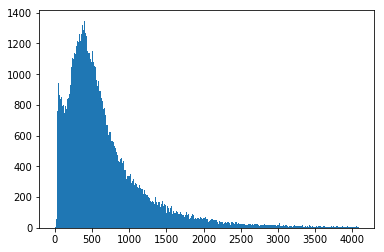

In [18]:
plt.hist(totalNumWords, bins = np.arange(0, 4100, 10))

In [17]:
plt.show()

In [16]:
all_data.shape

(204554, 3)